# Midterm 1 - Assignment 1
## Diego Arcelli - 647979

### Importing needed modules and dowloading the dataset

In [37]:
import matplotlib.pyplot as plt
from hmmlearn import hmm
import numpy as np
import pandas as pd
!wget https://archive.ics.uci.edu/ml/machine-learning-databases/00374/energydata_complete.csv

./get_data.sh: 2: [[: not found


0

### Extracting the columns of date, appliances and ligths

In [27]:
dataset = pd.read_csv("energydata_complete.csv")
date = dataset["date"].to_numpy()
lights = dataset["lights"].to_numpy()
appliances = dataset["Appliances"].to_numpy()

### Defining the function to train the HMM with Gaussian emissions

In [28]:
'''
function to define and fit the HMM with gaussian emissions for the passed sequence
- data: the sequence to use to fit the model
- n_states: the number of hidden states of the HMM

'''

def get_model(data, n_states):
    # creation of the model specifying the algorithm to use for the decoding (viterbi)
    model = hmm.GaussianHMM(n_components=n_states, covariance_type="diag", algorithm="viterbi", n_iter=1000)
    model.fit(data.reshape(-1,1))
    return model

### Fitting models for lights and appliances

We will fit a model for both the sequences (appliances and lights). For each sequence we will fit different models for different hidden states

In [29]:
# for each sequence we create a model of 2,3,4 states

n_states = [2, 3, 4, 5]

appliances_models = [get_model(appliances.reshape(-1,1), n_state) for n_state in n_states]
lights_models = [get_model(lights.reshape(-1,1), n_state) for n_state in n_states]

### Visualizing predicted points

In [30]:
def plot_models(data, models, column):
    colors = ["red", "green", "blue", "yellow", "purple"]
    for model in models:
        pred = model.predict(data.reshape(-1,1))
        for i in range(len(pred)):
            plt.plot(i, data[i], color=colors[pred[i]], marker="o")
        txt=f"{column}, model with {model.n_components} hidden states"
        plt.figtext(0.5, 0.01, txt, wrap=True, horizontalalignment='center', fontsize=12)
        plt.show()

### Showing the plots

Appliances


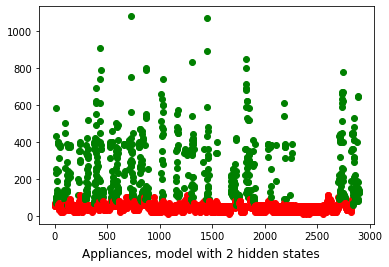

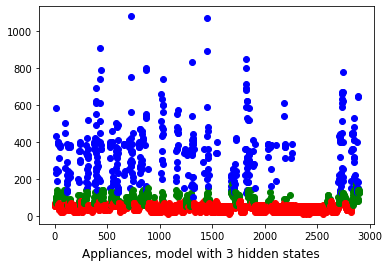

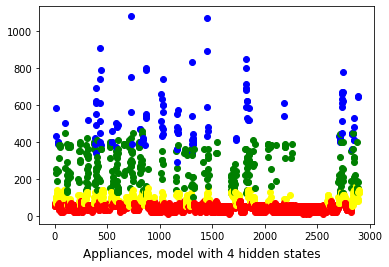

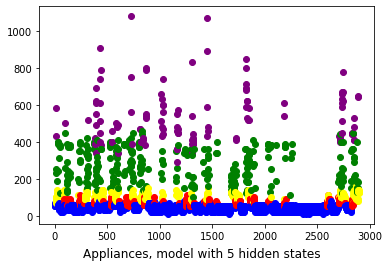

Lights


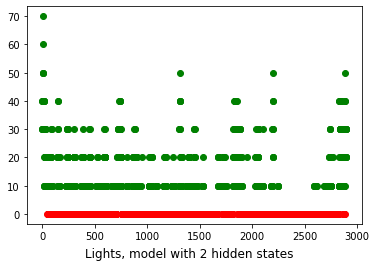

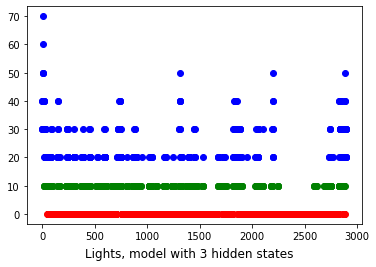

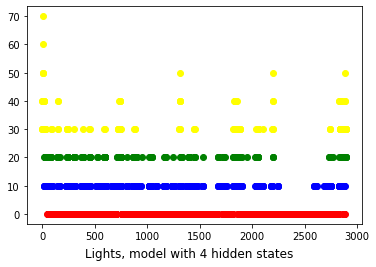

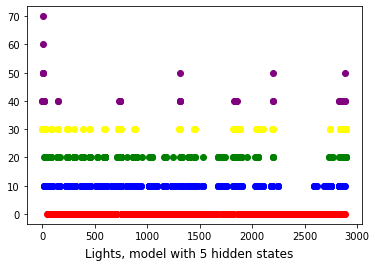

In [31]:
print("Appliances")
plot_models(appliances[:2900], appliances_models, "Appliances")
print("Lights")
plot_models(lights[:2900], lights_models, "Lights")

### Plot to compare actual data with model predictions

In [32]:
def compare_data(data, model, val_range, column):
    plt.plot(data, label="Actual data")
    mapping = np.linspace(val_range[0], val_range[1], model.n_components)
    pred = model.predict(data.reshape(-1,1))
    pred = [mapping[val] for val in pred]
    plt.plot(pred, label=f"{model.n_components} hidden states")
    txt=f"{column}, model with {model.n_components} hidden states"
    plt.figtext(0.5, 0.01, txt, wrap=True, horizontalalignment='center', fontsize=12)
    plt.show()
    

### Plotting the comparison graphs

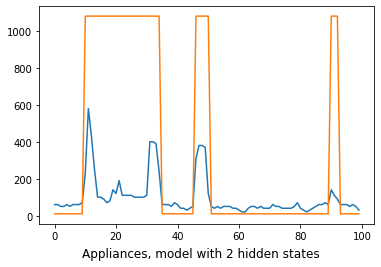

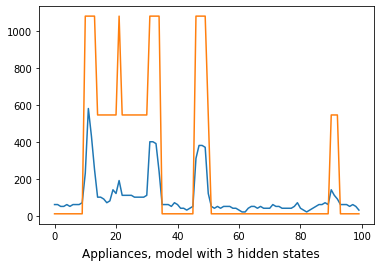

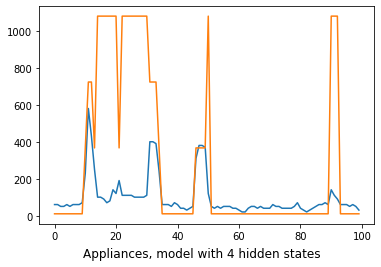

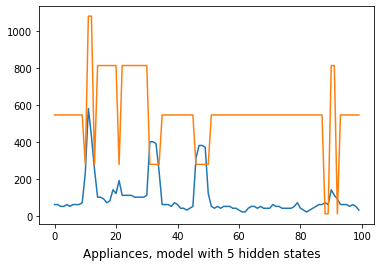

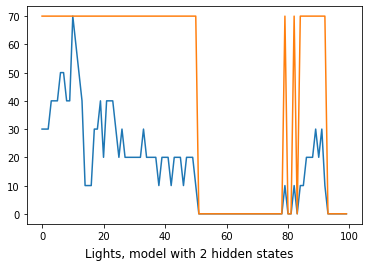

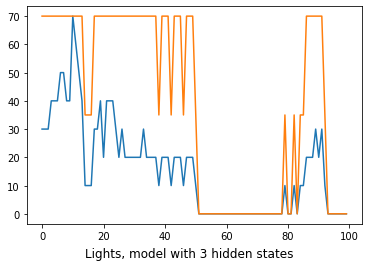

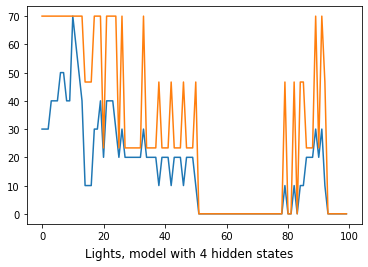

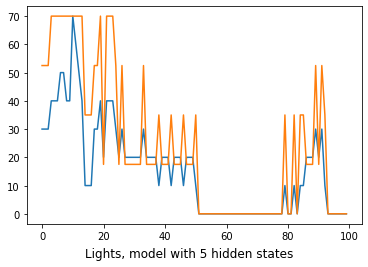

In [33]:
appliances_range = [appliances.min(), appliances.max()]
lights_range = [lights.min(), lights.max()]

for model in appliances_models:
    compare_data(appliances[:100], model, appliances_range, "Appliances")

for model in lights_models:
    compare_data(lights[:100], model, lights_range, "Lights")